In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

#gmap
import gmaps

# Google developer API key
from config import g_key
gmaps.configure(api_key=g_key)

from geopy.geocoders import GoogleV3

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Read csv files
data_engineer = pd.read_csv("DataEngineer.csv")
data_analyst = pd.read_csv("DataAnalyst.csv")
data_science = pd.read_csv("DataScientist.csv")

# Data cleaning
data_analyst = data_analyst.drop(columns=["Unnamed: 0"])
data_science = data_science.drop(columns=["Unnamed: 0","index"])

In [3]:
# concatinate all 3 dataframe into final dataframe

list_df = [data_science, data_analyst, data_engineer]
final_df = pd.concat(list_df)

# Data cleaning
final_df = final_df.drop(['Job Description','Rating','Headquarters','Size','Founded','Type of ownership','Sector',
                          'Revenue','Competitors','Easy Apply'],axis=1)

# Remove all ratings after company name
final_df['Company Name'] = final_df['Company Name'].str.split(pat="\n").str[0]

# Remove all (Glassdoor est.) after estimated
final_df['Salary Estimate'] = final_df['Salary Estimate'].str.split(pat="(").str[0]

# Change '-1' to 'Unknown' in Industry column
final_df['Industry'].replace({"-1":'Unknown'},inplace=True)

final_df


,Job Title,Salary Estimate,Company Name,Location,Industry
0,Senior Data Scientist,$111K-$181K,Hopper,"New York, NY",Travel Agencies
1,"Data Scientist, Product Analytics",$111K-$181K,Noom US,"New York, NY","Health, Beauty, & Fitness"
2,Data Science Manager,$111K-$181K,Decode_M,"New York, NY",Unknown
3,Data Analyst,$111K-$181K,Sapphire Digital,"Lyndhurst, NJ",Internet
4,"Director, Data Science",$111K-$181K,United Entertainment Group,"New York, NY",Advertising & Marketing
...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K,PMG Global,"Westlake, TX",Computer Hardware & Software
2524,Electrical Engineer,$76K-$128K,Albin Engineering Services,"Fort Worth, TX",Staffing & Outsourcing
2525,Sr. Big Data Engineer,$76K-$128K,Cincinnati Bell Technology Solutions,"Irving, TX",IT Services
2526,Senior Big Data / ETL Engineer,$76K-$128K,Schwab,"Westlake, TX",Unknown


In [4]:
# Sort to find Top 5 Industry

industry_ranking = final_df['Industry'].value_counts(sort=True)
industry = pd.DataFrame(industry_ranking)
industry_g = industry.head(6)
industry_g

,Industry
Unknown,1277
IT Services,1152
Staffing & Outsourcing,838
Computer Hardware & Software,619
Internet,448
Health Care Services & Hospitals,399


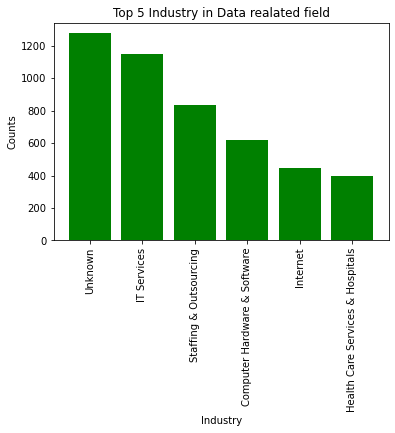

<Figure size 432x288 with 0 Axes>

In [5]:
#Plot the bar chart using pandas
y_values = industry_g['Industry']
x_values = industry_g.index.values

plt.bar(x_values,y_values, color="green", align="center")

# Formatting - title and axes
plt.title("Top 5 Industry in Data realated field")
plt.xlabel("Industry")
plt.ylabel("Counts")

plt.xticks(rotation = 90)

# Show and layout
plt.show()
plt.tight_layout()

In [6]:
# Sort to find Top 5 Company
                                               
company_ranking = final_df['Company Name'].value_counts(sort=True)
company = pd.DataFrame(company_ranking)
company_g = company.head(5)
company_g

,Company Name
Apple,88
"Staffigo Technical Services, LLC",86
Amazon,78
IBM,64
Diverse Lynx,62


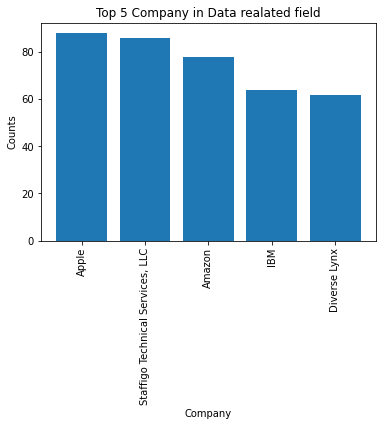

<Figure size 432x288 with 0 Axes>

In [7]:
#Plot the bar chart using pandas
y_values = company_g['Company Name']
x_values = company_g.index.values

plt.bar(x_values,y_values, align="center")

# Formatting - title and axes
plt.title("Top 5 Company in Data realated field")
plt.xlabel("Company")
plt.ylabel("Counts")

plt.xticks(rotation = 90)
# Show and layout
plt.show()
plt.tight_layout()

In [9]:
# Use the GoogleV3 geolocator
geolocator = GoogleV3(g_key)

# Use for loop to loops over table
for index, row in final_df.iterrows():
    # Initiate geocode function
    location = geolocator.geocode(row["Location"], timeout=10)
    # Locate the location and get an output lat & lng
    final_df.loc[index,"Latitude"] = location.latitude
    final_df.loc[index,"Longitude"] = location.longitude
    
final_df

,Job Title,Salary Estimate,Company Name,Location,Industry,Latitude,Longitude
0,Senior Data Scientist,$111K-$181K,Hopper,"New York, NY",Travel Agencies,40.712775,-74.005973
1,"Data Scientist, Product Analytics",$111K-$181K,Noom US,"New York, NY","Health, Beauty, & Fitness",40.712775,-74.005973
2,Data Science Manager,$111K-$181K,Decode_M,"New York, NY",Unknown,40.712775,-74.005973
3,Data Analyst,$111K-$181K,Sapphire Digital,"Lyndhurst, NJ",Internet,40.712775,-74.005973
4,"Director, Data Science",$111K-$181K,United Entertainment Group,"New York, NY",Advertising & Marketing,40.712775,-74.005973
...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K,PMG Global,"Westlake, TX",Computer Hardware & Software,32.991235,-97.195014
2524,Electrical Engineer,$76K-$128K,Albin Engineering Services,"Fort Worth, TX",Staffing & Outsourcing,32.755488,-97.330766
2525,Sr. Big Data Engineer,$76K-$128K,Cincinnati Bell Technology Solutions,"Irving, TX",IT Services,32.814018,-96.948894
2526,Senior Big Data / ETL Engineer,$76K-$128K,Schwab,"Westlake, TX",Unknown,32.991235,-97.195014


In [36]:
# Builds final clean data frame
# Use group by
location_groupby = final_df.groupby("Location")

job_count = location_groupby["Job Title"].count()
lat = location_groupby["Latitude"].first()
long = location_groupby["Longitude"].first()
job_title = location_groupby["Job Title"].first()


final_clean_df = pd.DataFrame(
    {
        "Job Count": job_count,
        "Latitude": lat,
        "Longitude": long,
        "Job Title" : job_title
    }
)

final_clean_df

,Job Count,Latitude,Longitude,Job Title
Location,,,,
"Addison, TX",6,32.755488,-97.330766,Data Scientist
"Alachua, FL",1,41.878114,-87.629798,Data Management Analyst II
"Alameda, CA",1,30.267153,-97.743061,Sr. Data Analyst( Healthcare)
"Alhambra, CA",2,29.760427,-95.369803,Senior Data Bi Analyst
"Allegheny West, PA",3,32.776664,-96.796988,Data Analyst
...,...,...,...,...
"Woodbridge, NJ",1,34.180839,-118.308966,"Senior Business Analyst, Data Management"
"Woodcliff Lake, NJ",1,41.878114,-87.629798,Clinical Data Designer (Sr. SDTM Programmer/An...
"Woodland Hills, CA",15,34.021122,-118.396467,Data Scientist


In [37]:
# Creates a new DF with the 5 locations with most job openings

top_5_df = final_clean_df.nlargest(5, "Job Count", keep="first")
top_5_df

,Job Count,Latitude,Longitude,Job Title
Location,,,,
"New York, NY",800,40.712775,-74.005973,Senior Data Scientist
"Chicago, IL",652,29.760427,-95.369803,Data Scientist
"Austin, TX",625,30.267153,-97.743061,Data Scientist (Engineering)
"San Diego, CA",561,30.267153,-97.743061,Lead Data Scientist
"Houston, TX",490,39.952584,-75.165222,Quantitative Research Scientist


In [38]:
# Set heatmap paramaters
location = final_clean_df[["Latitude","Longitude"]]
weight = final_clean_df["Job Count"]

# Plot Heatmap
fig = gmaps.figure()

# create heat layer
heat_layer = gmaps.heatmap_layer(location,
                                 weights=weight,
                                 dissipating=False,
                                 max_intensity=100,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))